<a href="https://colab.research.google.com/github/snpsuen/Deep_Learning_Notebook_Modelling/blob/main/MLP_ofdm_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

allCarriers:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
pilotCarriers: [ 0  8 16 24 32 40 48 56 63]
dataCarriers:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]
Number of data carriers:  55
Number of pilot carriers:  9


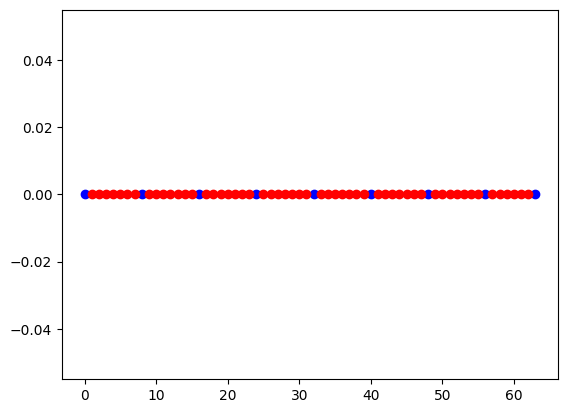

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K = 64 # number of OFDM subcarriers
CP = K//4  # length of the cyclic prefix: 25% of the block
P = 8 # number of pilot carriers per OFDM block
pilotValue = 3+3j # The known value each pilot transmits

allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])
pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier.

# For convenience of channel estimation, let's make the last carriers also be a pilot
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

# data carriers are all remaining carriers
dataCarriers = np.delete(allCarriers, pilotCarriers)

print ("allCarriers:   %s" % allCarriers)
print ("pilotCarriers: %s" % pilotCarriers)
print ("dataCarriers:  %s" % dataCarriers)
print("Number of data carriers: ", len(dataCarriers))
print("Number of pilot carriers: ", len(pilotCarriers))

plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data')

Number of payload bits in an OFDM symbol:  220


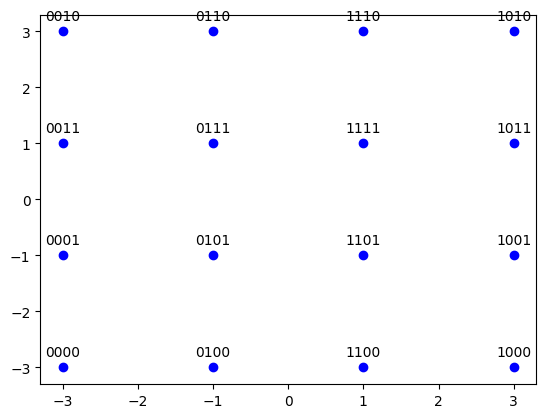

In [2]:
mu = 4 # bits per symbol (i.e. 16QAM)
payloadsize = len(dataCarriers)*mu  # number of payload bits per OFDM symbol
print("Number of payload bits in an OFDM symbol: ", payloadsize)

mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

demapping_table = {v : k for k, v in mapping_table.items()}

for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

channelResponse shape:  (64,)


Text(0, 0.5, '$|cir(t)|$')

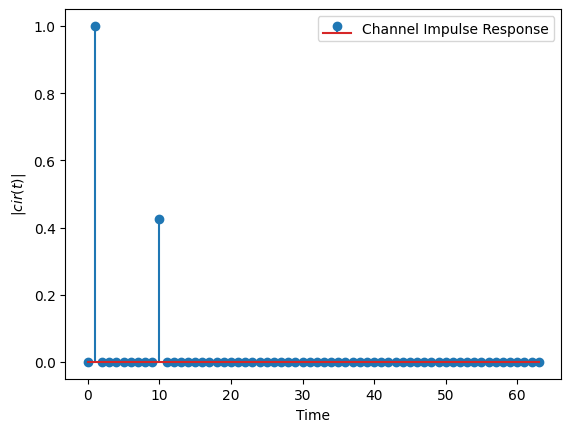

In [3]:
channelResponse = np.zeros(64, dtype=complex)
channelResponse[1] = 1
channelResponse[10] = 0.3 + 0.3j
#channelResponse = np.array([1, 0, 0.3+0.3j])
print ("channelResponse shape: ", channelResponse.shape)
# channelResponse = np.array([1, 0, 0, 0.2+0.2j])  # the impulse response of the wireless channel
timeline = np.arange(64)
plt.stem(timeline, abs(channelResponse), label='Channel Impulse Response')
plt.legend(fontsize=10)
plt.xlabel('Time'); plt.ylabel('$|cir(t)|$')

Hf_CIR shape:  (64,)
Hf_CIR:  [ 1.3       +0.3j         1.41129668-0.18078695j  1.14314411-0.58705921j
  0.72123185-0.64304736j  0.49961546-0.38268343j  0.64621278-0.11863406j
  0.99382844-0.16360134j  1.18912241-0.55162347j  1.00710678-1.00710678j
  0.55162347-1.18912241j  0.16360134-0.99382844j  0.11863406-0.64621278j
  0.38268343-0.49961546j  0.64304736-0.72123185j  0.58705921-1.14314411j
  0.18078695-1.41129668j -0.3       -1.3j        -0.51412909-0.91241491j
 -0.35744915-0.58881639j -0.05457619-0.60417766j  0.04158064-0.92387953j
 -0.23568825-1.23468395j -0.71792906-1.2234385j  -1.05050524-0.85578027j
 -1.00710678-0.40710678j -0.69024064-0.21828133j -0.43950072-0.3932114j
 -0.52915858-0.70710522j -0.92387953-0.8069475j  -1.30970302-0.52599316j
 -1.37275417-0.03273149j -1.07795454+0.31809481j -0.7       +0.3j
 -0.57907277+0.01524733j -0.81842645-0.19687857j -1.19264882-0.062478j
 -1.3481436 +0.38268343j -1.11762975+0.82415942j -0.66911078+0.94753912j
 -0.3568985 +0.7171631j  -0.407

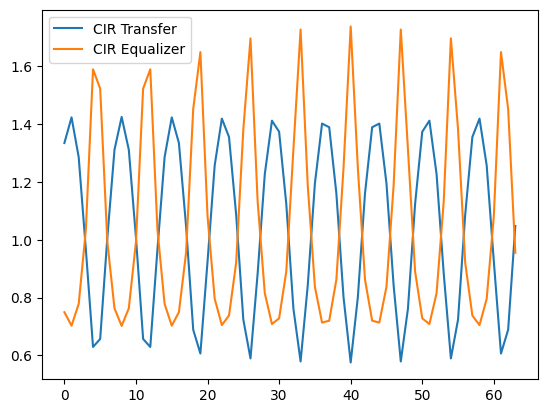

In [4]:
Hf_CIR = np.fft.fft(channelResponse, K)
Eq_CIR = np.reciprocal(Hf_CIR)
plt.plot(allCarriers, abs(Hf_CIR), label='CIR Transfer')
plt.plot(allCarriers, abs(Eq_CIR), label='CIR Equalizer')
plt.legend()

SNRdb = 25  # signal to noise-ratio in dB at the receiver
print ("Hf_CIR shape: ", Hf_CIR.shape)
print ("Hf_CIR: ", Hf_CIR)

In [5]:
def SP(bits):
    return bits.reshape((len(dataCarriers), mu))

def Mapping(parallelbits):
    return np.array([mapping_table[tuple(pb)] for pb in parallelbits])

def OFDM_Carriers(QAM, pilot):
    ofdm_sym = np.zeros(K, dtype=complex) # the overall K subcarriers
    ofdm_sym[pilotCarriers] = pilot  # allocate the pilot subcarriers
    ofdm_sym[dataCarriers] = QAM  # allocate the data subcarriers
    return ofdm_sym

def IDFT(frequency_weights):
    return np.fft.ifft(frequency_weights)

def prependCP(OFDM_time):
    cp = OFDM_time[-CP:]               # take the last CP samples ...
    return np.hstack([cp, OFDM_time])  # ... and add them to the beginning

def prependCP(OFDM_time):
    cp = OFDM_time[-CP:]               # take the last CP samples ...
    return np.hstack([cp, OFDM_time])  # ... and add them to the beginning

def transmit(signal):
    convolution = np.convolve(signal, channelResponse)
    signal_power = np.mean(abs(convolution**2))
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
    # Generate complex noise with given variance
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolution.shape)+1j*np.random.randn(*convolution.shape))

    # print ("Convoluted signal shape: ", convolution.shape)
    # print ("Convoluted signal length: ", len(convolution))
    # print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))
    return convolution + noise

def removeCP(signal):
    return signal[CP:(CP+K)]

def DFT(OFDM_intime):
    return np.fft.fft(OFDM_intime)

In [6]:
def create_learning_data(sampleize, testingsize):
  for i in range(sampleize):
    bits = np.random.binomial(n=1, p=0.5, size=payloadsize)
    SP_bits = SP(bits)
    QAM_payload = Mapping(SP_bits)
    OFDM_symbol = OFDM_Carriers(QAM_payload, pilotValue)
    OFDM_time = IDFT(OFDM_symbol)
    CP_OFDM_time = prependCP(OFDM_time)
    OFDM_RX = transmit(CP_OFDM_time)
    OFDM_RX_stripped = removeCP(OFDM_RX)
    OFDM_demod = DFT(OFDM_RX_stripped)

    pilot_output = OFDM_demod[pilotCarriers]
    H_pilot = pilot_output/pilotValue
    H_known = OFDM_demod/OFDM_symbol

    if i == 0:
      X = H_pilot.reshape(1,P)
      Y = H_known.reshape(1,K)
    else:
      X = np.append(X, H_pilot.reshape(1,P), axis=0)
      Y = np.append(Y, H_known.reshape(1,K), axis=0)

  X_training, X_testing = X[:-testingsize], X[-testingsize:]
  Y_training, Y_testing = Y[:-testingsize], Y[-testingsize:]

  return X_training, X_testing, Y_training, Y_testing

sampleize = 120
testingsize = 20
X_training, X_testing, Y_training, Y_testing = create_learning_data(sampleize, testingsize)
print("X_training.shape: ", X_training.shape)
print("Y_training.shape: ", Y_training.shape)
print("X_testing.shape: ", X_testing.shape)
print("Y_testing.shape: ", Y_testing.shape)

X_training.shape:  (100, 9)
Y_training.shape:  (100, 64)
X_testing.shape:  (20, 9)
Y_testing.shape:  (20, 64)


In [7]:
from numpy import sqrt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

def MLP_modeling(X_training, Y_training, X_testing, Y_testing):
  input_dim = X_training.shape[1]
  output_dim = Y_training.shape[1]
  model = Sequential()
  model.add(Dense(256, activation='relu', kernel_initializer='he_normal', input_dim=input_dim))
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(output_dim))
  model.summary()

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  # fit the model
  model.fit(X_training, Y_training, epochs=100, batch_size=32, verbose=2, validation_data=(X_testing, Y_testing))

  mse, mae = model.evaluate(X_testing, Y_testing, verbose=0)
  print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
  return model

RX_training, IX_training = X_training.real, X_training.imag
RX_testing, IX_testing = X_testing.real, X_testing.imag
RY_training, IY_training = Y_training.real, Y_training.imag
RY_testing, IY_testing = Y_testing.real, Y_testing.imag

rofdm_model = MLP_modeling(RX_training, RY_training, RX_testing, RY_testing)
iofdm_model = MLP_modeling(IX_training, IY_training, IX_testing, IY_testing)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
Total params: 43712 (170.75 KB)
Trainable params: 43712 (170.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
4/4 - 1s - loss: 0.9404 - mae: 0.7628 - val_loss: 0.4763 - val_mae: 0.5312 - 758ms/epoch - 190ms/step
Epoch 2/100
4/4 - 0s - loss: 0.3849 - mae: 0.4700 - val_loss: 0.2032 - val_mae: 0.3397 - 28ms/epoch - 7ms/step
Epoch 3/100
4/4 - 0s - loss: 0.1683 - mae: 0.3083 - val_l

In [8]:
bits = np.random.binomial(n=1, p=0.5, size=payloadsize)
print ("Bits count: ", len(bits))
print ("First 20 bits: ", bits[:50])
print ("Mean of bits (should be around 0.5): ", np.mean(bits))

Bits count:  220
First 20 bits:  [1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
Mean of bits (should be around 0.5):  0.42272727272727273


In [9]:
SP_bits = SP(bits)
print ("SP_bits length: ", len(SP_bits))
print ("First 10 bit groups")
print (SP_bits[:10,:])

SP_bits length:  55
First 10 bit groups
[[1 1 0 1]
 [1 1 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 1]
 [0 1 1 1]]


In [10]:
QAM_payload = Mapping(SP_bits)
print ("QAM_payload array length: ", len(QAM_payload))
print ("QAM_payload element type: ", QAM_payload.dtype)
print ("First 8 QAM_payload symbols and bits:")
print (SP_bits[:8,:])
print (QAM_payload[:8])

QAM_payload array length:  55
QAM_payload element type:  complex128
First 8 QAM_payload symbols and bits:
[[1 1 0 1]
 [1 1 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]
[ 1.-1.j  1.-1.j -3.+3.j  3.-3.j  1.+1.j -3.-3.j -1.-3.j -3.-1.j]


In [11]:
OFDM_symbol = OFDM_Carriers(QAM_payload, pilotValue)
print ("ODFM_symbol shape: ", OFDM_symbol.shape)
print ("ODFM_symbol array length: ", len(OFDM_symbol))
print ("ODMF_symbol element type: ", OFDM_symbol.dtype)

ODFM_symbol shape:  (64,)
ODFM_symbol array length:  64
ODMF_symbol element type:  complex128


In [12]:
OFDM_time = IDFT(OFDM_symbol)
print ("OFDM_time shape: ", OFDM_time.shape)
print ("Number of OFDM samples in time-domain before CP: ", len(OFDM_time))

OFDM_time shape:  (64,)
Number of OFDM samples in time-domain before CP:  64


In [13]:
CP_OFDM_time = prependCP(OFDM_time)
print ("Number of OFDM samples in time domain with CP: ", len(CP_OFDM_time))

Number of OFDM samples in time domain with CP:  80


Number of received OFDM_RX samples in time domain:  143


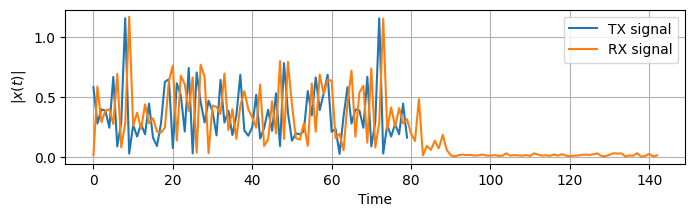

In [14]:
OFDM_TX = CP_OFDM_time
OFDM_RX = transmit(OFDM_TX)
print ("Number of received OFDM_RX samples in time domain: ", len(OFDM_RX))
plt.figure(figsize=(8,2))
plt.plot(abs(OFDM_TX), label='TX signal')
plt.plot(abs(OFDM_RX), label='RX signal')
plt.legend(fontsize=10)
plt.xlabel('Time'); plt.ylabel('$|x(t)|$');
plt.grid(True);

In [15]:
OFDM_RX_stripped = removeCP(OFDM_RX)
print ("Number of received OFDM_RX_stripped samples in time domain: ", len(OFDM_RX_stripped))

Number of received OFDM_RX_stripped samples in time domain:  64


In [16]:
OFDM_demod = DFT(OFDM_RX_stripped)
print ("OFDM_demod shape: ", OFDM_demod.shape)
print ("Number of OFDM_infreq samples in frequency domain: ", len(OFDM_demod))

pilot_output = OFDM_demod[pilotCarriers]
H_pilot = pilot_output/pilotValue
print ("H_pilot.shape: ", H_pilot.shape)

OFDM_demod shape:  (64,)
Number of OFDM_infreq samples in frequency domain:  64
H_pilot.shape:  (9,)


In [17]:
RH_pilot = H_pilot.real.reshape(1, P)
IH_pilot = H_pilot.imag.reshape(1, P)
print("RH_pilot.shape: ", RH_pilot.shape)
print("IH_pilot.shape: ", IH_pilot.shape)

RH_predict = rofdm_model.predict(RH_pilot)
IH_predict = iofdm_model.predict(IH_pilot)
print("RH_predict.shape: ", RH_predict.shape)
print("RH_predict: ", RH_predict)
print("IH_predict.shape: ", IH_predict.shape)
print("IH_predict: ", IH_predict)

RH_pilot.shape:  (1, 9)
IH_pilot.shape:  (1, 9)
1/1 [==============================] - 0s 39ms/step
RH_predict.shape:  (1, 64)
RH_predict:  [[ 1.2848147e+00  1.3524544e+00  1.1202239e+00  7.1867454e-01
   4.8893863e-01  6.5134978e-01  1.0164509e+00  1.1900784e+00
   9.7939312e-01  5.4201823e-01  1.6070482e-01  9.8318957e-02
   3.7606519e-01  6.3234055e-01  5.6398940e-01  1.8231161e-01
  -2.9230669e-01 -5.1142800e-01 -3.2954186e-01 -4.7332361e-02
   2.3685353e-02 -2.5915885e-01 -7.1582556e-01 -1.0192176e+00
  -9.8410702e-01 -6.7050558e-01 -4.3181336e-01 -5.3440797e-01
  -9.4826913e-01 -1.2901914e+00 -1.3276087e+00 -1.0564184e+00
  -6.9134593e-01 -5.8739728e-01 -8.2944238e-01 -1.1544709e+00
  -1.3365500e+00 -1.1068439e+00 -6.7259544e-01 -3.3830512e-01
  -3.9046863e-01 -7.2751629e-01 -9.4260997e-01 -8.4466118e-01
  -3.8649029e-01  6.7569360e-02  1.7290364e-01 -3.8981959e-02
  -2.8425878e-01 -2.7982309e-01 -1.2084153e-03  5.3142637e-01
   7.5920498e-01  6.5062600e-01  3.6993149e-01  2.2582

In [18]:
RH_predict = RH_predict.reshape(K,)
IH_predict = IH_predict.reshape(K,)
H_predict = RH_predict + 1j*IH_predict
print("H_predict.shape: ", H_predict.shape)
print("H_predict: ", H_predict)

def equalize(OFDM_demod, Hest):
    return OFDM_demod / Hest
equalized_H_predict = equalize(OFDM_demod, H_predict)
print("equalized_H_predict.shape: ", equalized_H_predict.shape)
print("equalized_H_predict: ", equalized_H_predict)

H_predict.shape:  (64,)
H_predict:  [ 1.2848147e+00+0.28859672j  1.3524544e+00-0.16402698j
  1.1202239e+00-0.59948987j  7.1867454e-01-0.64705336j
  4.8893863e-01-0.36620528j  6.5134978e-01-0.12845254j
  1.0164509e+00-0.162339j    1.1900784e+00-0.53181696j
  9.7939312e-01-0.99679136j  5.4201823e-01-1.170048j
  1.6070482e-01-0.9958894j   9.8318957e-02-0.6612882j
  3.7606519e-01-0.5131829j   6.3234055e-01-0.7210314j
  5.6398940e-01-1.1267072j   1.8231161e-01-1.3920275j
 -2.9230669e-01-1.2892597j  -5.1142800e-01-0.9046209j
 -3.2954186e-01-0.5759861j  -4.7332361e-02-0.5998962j
  2.3685353e-02-0.9133465j  -2.5915885e-01-1.2172216j
 -7.1582556e-01-1.2120137j  -1.0192176e+00-0.8281485j
 -9.8410702e-01-0.40437666j -6.7050558e-01-0.21364832j
 -4.3181336e-01-0.37428904j -5.3440797e-01-0.6765102j
 -9.4826913e-01-0.80279243j -1.2901914e+00-0.5105561j
 -1.3276087e+00-0.03734293j -1.0564184e+00+0.33035538j
 -6.9134593e-01+0.29516616j -5.8739728e-01+0.00161388j
 -8.2944238e-01-0.21596888j -1.1544709e+

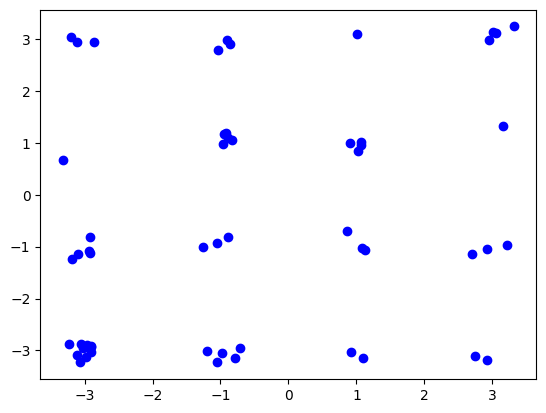

In [19]:
def get_payload(equalized):
    return equalized[dataCarriers]

QAM_est = get_payload(equalized_H_predict)
plt.plot(QAM_est.real, QAM_est.imag, 'bo');

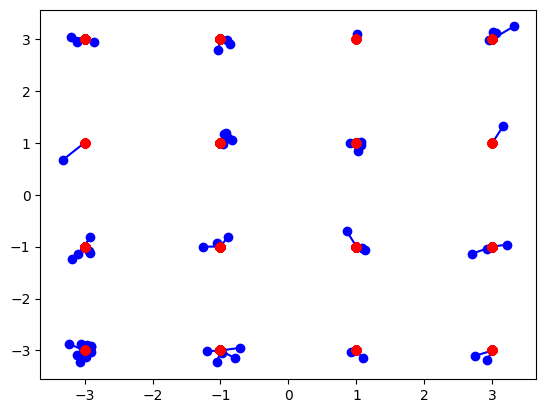

In [20]:
def Demapping(QAM):
    # array of possible constellation points
    constellation = np.array([x for x in demapping_table.keys()])

    # calculate distance of each RX point to each possible point
    dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1)))

    # for each element in QAM, choose the index in constellation
    # that belongs to the nearest constellation point
    const_index = dists.argmin(axis=1)

    # get back the real constellation point
    hardDecision = constellation[const_index]

    # transform the constellation point into the bit groups
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision

PS_est, hardDecision = Demapping(QAM_est)
for qam, hard in zip(QAM_est, hardDecision):
    plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'b-o');
    plt.plot(hardDecision.real, hardDecision.imag, 'ro')

In [21]:
def PS(bits):
    return bits.reshape((-1,))
bits_est = PS(PS_est)

In [22]:
print ("Obtained Bit error rate: ", np.sum(abs(bits-bits_est))/len(bits))

Obtained Bit error rate:  0.0


In [23]:
print("1. First 100 bits of bits:")
print(bits[:100])
print("2. First 100 bits of bits_est:")
print(bits_est[:100])

1. First 100 bits of bits:
[1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0]
2. First 100 bits of bits_est:
[1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0]


pilots shape:  (9,)
pilots :  [ 2.98832879+4.76386268e+00j  5.84066038-1.00427802e-01j
  2.91092101-4.93630016e+00j -1.71488153-4.17314761e+00j
 -3.0350062 -1.23713629e+00j -2.56173681-4.03064650e-03j
 -2.96795252+1.16781281e+00j -1.72495386+4.16979320e+00j
  1.25553208+4.40948028e+00j]
Hest_at_pilots shape:  (9,)
Hest_at_pilots :  [ 1.29203191+0.29592231j  0.95670543-0.99018136j -0.33756319-1.3078702j
 -0.98133819-0.40971101j -0.71202375+0.29964498j -0.42762791+0.42628436j
 -0.30002328+0.68929422j  0.40747322+0.98245784j  0.94416873+0.52565803j]
HfCIR_at_pilots shape:  (9,)
HfCIR_at_pilots :  [ 1.3       +0.3j         1.00710678-1.00710678j -0.3       -1.3j
 -1.00710678-0.40710678j -0.7       +0.3j        -0.40710678+0.40710678j
 -0.3       +0.7j         0.40710678+1.00710678j  0.91241491+0.51412909j]
Hest shape:  (64,)


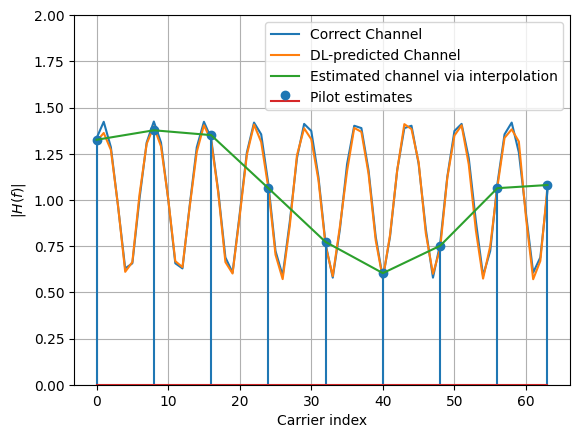

In [24]:
import scipy
def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  # extract the pilot values from the RX signal
    # OFDM_demod[f] = Hest[f] * OFDM_symbol[f]
    # OFDM_dmod[pilotCarriers] = Hest[pilotCarriers] * OFDM_symbol[pilotCarriers]
    # OFDM_dmod[pilotCarriers] = Hest[pilotCarriers] * pilotValue
    # Hest[pilotCarriers] = OFDM_dmod[pilotCarriers] / pilotValue

    Hest_at_pilots = OFDM_demod[pilotCarriers] / pilotValue # divide by the transmitted pilot values
    HfCIR_at_pilots = Hf_CIR[pilotCarriers]

    print("pilots shape: ", pilots.shape)
    print("pilots : ", pilots)
    print("Hest_at_pilots shape: ", Hest_at_pilots.shape)
    print("Hest_at_pilots : ", Hest_at_pilots)
    print("HfCIR_at_pilots shape: ", HfCIR_at_pilots.shape)
    print("HfCIR_at_pilots : ", HfCIR_at_pilots)

    # Perform interpolation between the pilot carriers to get an estimate
    # of the channel in the data carriers. Here, we interpolate absolute value and phase
    # separately
    Hest_abs = scipy.interpolate.interp1d(pilotCarriers, abs(Hest_at_pilots), kind='linear')(allCarriers)
    Hest_phase = scipy.interpolate.interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind='linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j*Hest_phase)

    plt.plot(allCarriers, abs(Hf_CIR), label='Correct Channel')
    plt.plot(allCarriers, abs(H_predict), label='DL-predicted Channel')
    plt.stem(pilotCarriers, abs(Hest_at_pilots), label='Pilot estimates')
    plt.plot(allCarriers, abs(Hest), label='Estimated channel via interpolation')
    plt.grid(True); plt.xlabel('Carrier index'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)
    plt.ylim(0,2)

    return Hest

Hest = channelEstimate(OFDM_demod)
print ("Hest shape: ", Hest.shape)